In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as met
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import sklearn.svm as svm
import sklearn.neighbors as neig
import sklearn.decomposition as dec
from google.colab import files

df=pd.read_csv("data.csv")
df=df.iloc[:,1:32] #elimino la colonna id
y = df.iloc[:,0] 
X= df.iloc[:,1:32]

X=X.to_numpy()
y=y.to_numpy() #trasformo il dataset in vettori

for i in range(y.size):
    if y[i]=='B':
        y[i]=0

    if y[i]=='M':
        y[i]=1

y=y.astype('int') #trasformo y in vettore binario

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.4, 
random_state=0) #divido training e testing set

reduction=0 #controllo, se 1 applico pca al dataset
if reduction:
  pca=dec.PCA(n_components=1)
  pca2=dec.PCA(n_components=5)
  pca2.fit(X_train)
  X_train=pca.fit_transform(X_train)
  X_test=pca.transform(X_test)
  print(pca.explained_variance_ratio_)
  print(pca2.explained_variance_ratio_)

imm=0 #controllo per salvare le immagini

def classifier(par,est): #funzione che crea il modello migliore
    gs = ms.GridSearchCV(estimator=est,cv=4,param_grid=par,
scoring='f1').fit(X_train, y_train) #grid search sugli iper-parametri
    model = gs.best_estimator_  #salvo modello migliore trainato su tutto set
    y_pred=gs.predict(X_test) #faccio previsione col modello migliore
    a=met.accuracy_score(y_test,y_pred) #calcolo metriche
    r=met.recall_score(y_test,y_pred)
    p=met.precision_score(y_test,y_pred)
    f=met.f1_score(y_test,y_pred)
    met.ConfusionMatrixDisplay.from_estimator(model,X_test,y_test) 
    plt.savefig("matrix.eps",format="eps")
    if imm: files.download("matrix.eps")
    met.RocCurveDisplay.from_estimator(model, X_test, y_test) 
    plt.savefig("roc.eps",format="eps")
    if imm: files.download("roc.eps")
    print("best parameters", gs.best_params_) #stampo parametri migliori
    plt.show()
    a=round(a,3)
    p=round(p,3)
    r=round(r,3)
    f=round(f,3)
    print(a,p,r,f)
    return model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


best parameters {'C': 0.1, 'penalty': 'l2'}


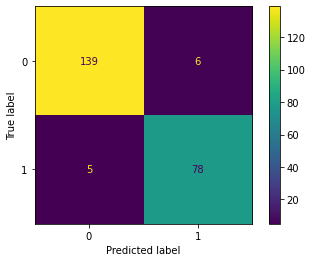

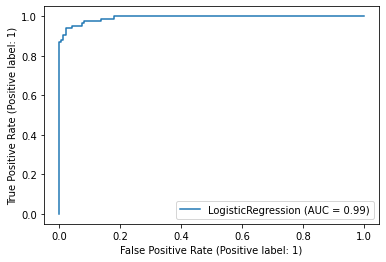

0.952 0.929 0.94 0.934


In [ ]:
est=lm.LogisticRegression(random_state=0) #creazione del modello
par = {"penalty": ["l2","l1"], 'C': [0.01, 0.1, 1]} #iper-parametri per gs
class_log=classifier(par,est) #applico funzione classifier

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


best parameters {'criterion': 'gini', 'max_depth': 4}


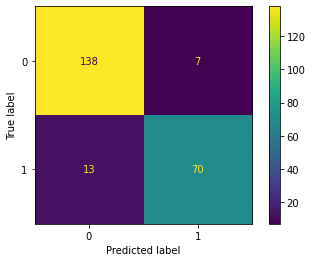

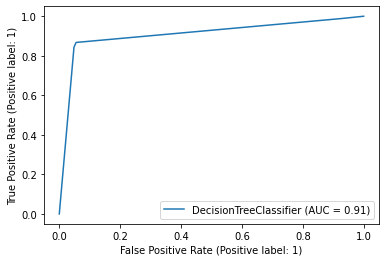

0.912 0.909 0.843 0.875


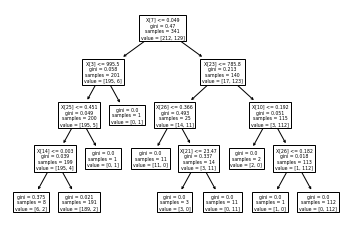

In [ ]:
par= {"criterion": ["gini","entropy"], "max_depth": [3,4,5]}
est=tree.DecisionTreeClassifier(random_state=0)
class_tree=classifier(par,est)
tree.plot_tree(class_tree) #stampo albero creato
plt.savefig("tree.eps",format="eps")
if imm: files.download("tree.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


best parameters {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 20}


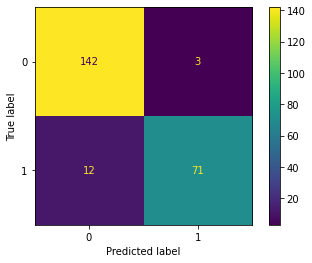

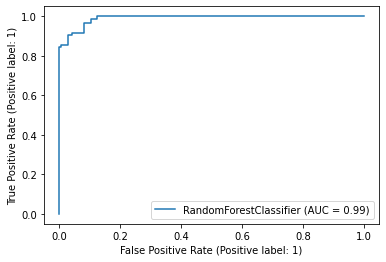

0.934 0.959 0.855 0.904


In [ ]:
est=ensemble.RandomForestClassifier(random_state=0)
par= {"criterion": ["gini","entropy"],"n_estimators":[10, 20, 30], 
      "max_depth": [2,3,4]}
class_forest=classifier(par,est)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


best parameters {'C': 0.1, 'kernel': 'linear'}


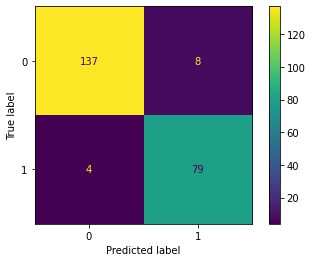

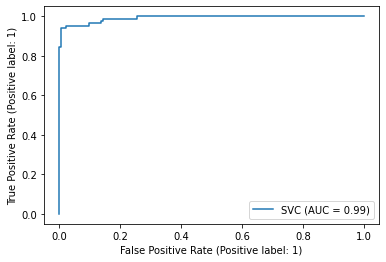

0.947 0.908 0.952 0.929


In [ ]:
est=svm.SVC(random_state=0)
par={'C':[0.01, 0.1, 1], "kernel":["linear","poly","sigmoid","rbf"]}
class_svm=classifier(par,est)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


best parameters {'n_neighbors': 3}


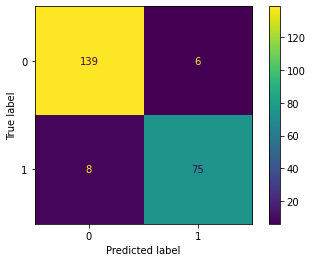

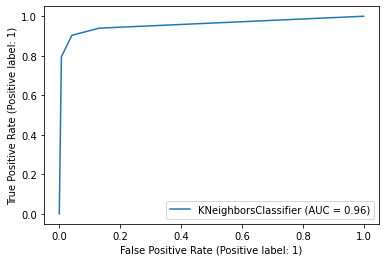

0.939 0.926 0.904 0.915


In [ ]:
est=neig.KNeighborsClassifier()
par={"n_neighbors":[3, 5, 7]}
class_knn=classifier(par,est)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

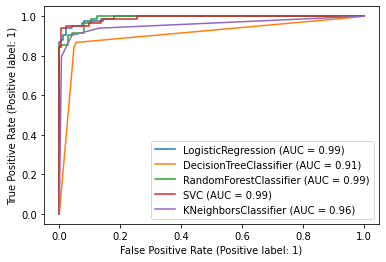

In [ ]:
disp=met.plot_roc_curve(class_log,X_test,y_test) #disegno tutte le curve roc 
met.plot_roc_curve(class_tree,X_test,y_test,ax=disp.ax_)
met.plot_roc_curve(class_forest,X_test,y_test,ax=disp.ax_)
met.plot_roc_curve(class_svm,X_test,y_test,ax=disp.ax_)
met.plot_roc_curve(class_knn,X_test,y_test,ax=disp.ax_)
plt.savefig("confronto.eps",format="eps")
files.download("confronto.eps")

0.917 0.932 0.831 0.879
0.912 0.970 0.783 0.867
0.930 0.972 0.831 0.896


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

0.921 0.945 0.831 0.885
0.908 0.908 0.831 0.868


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

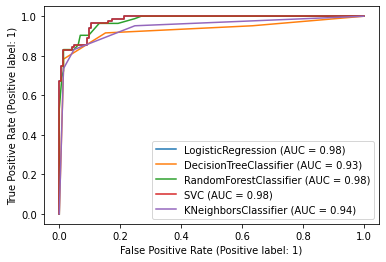

In [ ]:
class_log=lm.LogisticRegression(C=0.1,random_state=0) #modelli con best params 
class_tree=tree.DecisionTreeClassifier(criterion="gini",max_depth=4,
                                       random_state=0) 
class_forest=ensemble.RandomForestClassifier(criterion="entropy",
max_depth=3, n_estimators=20, random_state=0) 
class_svm=svm.SVC(kernel='linear', C =0.1,random_state=0)
class_knn=neig.KNeighborsClassifier(n_neighbors=3)

def evaluation(model): 
  clf=model.fit(X_train,y_train) #alleno modelli su training set ridotto
  y_pred = clf.predict(X_test) #valuto modelli su test set ridotto
  print('{:3.3f} {:3.3f} {:3.3f} {:3.3f}'.format(
      met.accuracy_score(y_test,y_pred),met.precision_score(y_test,y_pred),
      met.recall_score(y_test,y_pred), met.f1_score(y_test,y_pred)))
evaluation(class_log)
evaluation(class_tree)
evaluation(class_forest)
evaluation(class_svm)
evaluation(class_knn)

disp=met.plot_roc_curve(class_log,X_test,y_test) #disegno curve roc
met.plot_roc_curve(class_tree,X_test,y_test,ax=disp.ax_)
met.plot_roc_curve(class_forest,X_test,y_test,ax=disp.ax_)
met.plot_roc_curve(class_svm,X_test,y_test,ax=disp.ax_)
met.plot_roc_curve(class_knn,X_test,y_test,ax=disp.ax_)
plt.savefig("confronto_pca.eps",format="eps")
files.download("confronto_pca.eps")

In [ ]:
import torch as t
import tensorflow as tf
tf.keras.models.Sequential()